# How to create a simple transaction

In this example we will create an submit a transaction to the testnet using the command build and build raw.

## 1) Create a transaction using the command build

Using the build command, the fees and the changes are automatically calculated.  
The downside of using the build command is that you can't build the transaction off chain.

### Get utxo from the address of the sender

In [28]:
%%bash
# User 1 address
addrUser1=$(cat /users/$(whoami)/testnet/priv/wallet/Djessy/djessy.addr)
# Get the utxo from the user1 address
cardano-cli query utxo --address $addrUser1 --testnet-magic 1

                           TxHash                                 TxIx        Amount
--------------------------------------------------------------------------------------
8d4f02739f9f921e7d50cd7765527242a1ca5bd37dc479a550af99463290d89f     0        9799666446 lovelace + TxOutDatumNone


### Build the transaction

In [30]:
%%bash
# UTXO = TXHash + # + TxIx
UTXO_IN=8d4f02739f9f921e7d50cd7765527242a1ca5bd37dc479a550af99463290d89f#0
SENDER_ADDR=$(cat /users/$(whoami)/testnet/priv/wallet/Djessy/djessy.addr)
RECEIVER_ADDR=$(cat /users/$(whoami)/testnet/priv/wallet/Drake/drake.addr)
# Amount of ADA to sent in lovelace (1 ADA = 1000000 de lovelace)
OUTPUT=100000000 

# Build the transaction
cardano-cli transaction build \
--tx-in $UTXO_IN \
--tx-out $RECEIVER_ADDR+$OUTPUT \
--change-address $SENDER_ADDR \
--testnet-magic 1 \
--out-file tx-files/tx-one.raw

# Sign the transaction
cardano-cli transaction sign \
--signing-key-file /users/$(whoami)/testnet/priv/wallet/Djessy/djessy.skey \
--tx-body-file tx-files/tx-one.raw \
--out-file tx-files/tx-one.signed 

Estimated transaction fee: Lovelace 166777


### Flowchart of the transaction

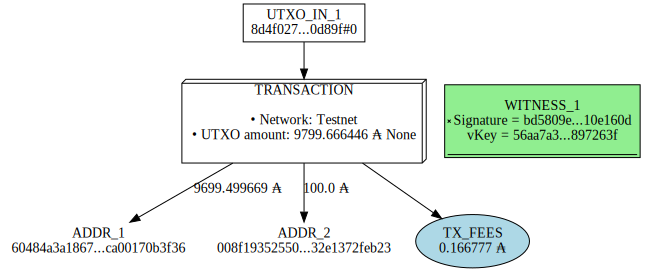

In [33]:
from IPython.display import SVG
from cardano_py_tools import transaction as tx
tx.vizualisation(txFile="tx-files/tx-one.signed", saveTo="tx-files/tx-one.svg")
SVG("tx-files/tx-one.svg")

### Submit the transaction

In [37]:
%%bash
cardano-cli transaction submit \
--tx-file tx-files/tx-one.signed \
--testnet-magic 1

Transaction successfully submitted.


### Check the receiver address 

In [41]:
%%bash
cardano-cli query utxo \
--address $(cat /users/$(whoami)/testnet/priv/wallet/Drake/drake.addr) \
--testnet-magic 1

                           TxHash                                 TxIx        Amount
--------------------------------------------------------------------------------------
0be38e65bec5eebde5ca3308a75e5c8adcd1b184534b445c984185d7d6f9aee5     1        100000000 lovelace + TxOutDatumNone
3e0f2493e7556968b9534e439111c08da761ac52783c7188b4b944068c0662ee     1        100000000 lovelace + TxOutDatumNone
8d4f02739f9f921e7d50cd7765527242a1ca5bd37dc479a550af99463290d89f     1        100000000 lovelace + TxOutDatumNone
a9ed1f9dd03fb6226f7ceab1c17e8dfb61ae0fadef7a51c0e53b672914676ca6     0        10000000000 lovelace + TxOutDatumNone


## 2) Create a transaction using the command build-raw

With the command build raw you can create the transaction of-chain before submit on chain.

### Build the transaction

In [102]:
%%bash
UTXO_IN=a9ed1f9dd03fb6226f7ceab1c17e8dfb61ae0fadef7a51c0e53b672914676ca6#0
SENDER_ADDR=$(cat /users/$(whoami)/testnet/priv/wallet/Drake/drake.addr)
RECEIVER_ADDR=$(cat /users/$(whoami)/testnet/priv/wallet/Djessy/djessy.addr)
OUTPUT=200000000
CHANGES=$((10000000000 - $OUTPUT))
          
# Build the draf transaction
cardano-cli transaction build-raw \
--fee 0 \
--tx-in $UTXO_IN \
--tx-out $RECEIVER_ADDR+$OUTPUT \
--tx-out $SENDER_ADDR+$CHANGES \
--out-file tx-files/tx-two.draft

# Get the parameter protocol json
cardano-cli query protocol-parameters \
--testnet-magic 1 \
--out-file tx-files/protocol-params.json
 
# Calculate the fee
FEE=$(echo $(cardano-cli transaction calculate-min-fee \
--protocol-params-file tx-files/protocol-params.json \
--tx-body-file tx-files/tx-two.draft \
--tx-in-count 1 \
--tx-out-count 2 \
--witness-count 1) | cut -d ' ' -f1)

# Build the transaction
cardano-cli transaction build-raw \
--fee $FEE \
--tx-in $UTXO_IN \
--tx-out $RECEIVER_ADDR+$OUTPUT \
--tx-out $SENDER_ADDR+$(($CHANGES - $FEE)) \
--out-file tx-files/tx-two.raw

# Sign the transaction
cardano-cli transaction sign \
--tx-body-file tx-files/tx-two.raw \
--signing-key-file /users/$(whoami)/testnet/priv/wallet/Drake/drake-payment.addr.skey \
--out-file tx-files/tx-two.signed 

### Flowchart of the transaction

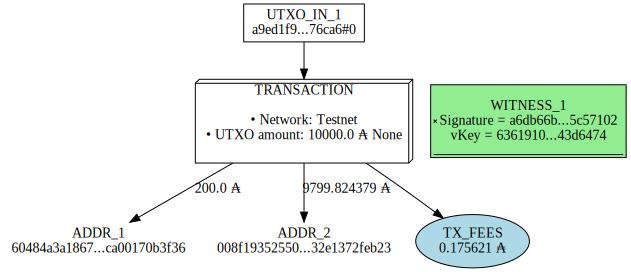

In [103]:
from IPython.display import SVG
from cardano_py_tools import transaction as tx
tx.vizualisation(txFile="tx-files/tx-two.signed", saveTo="tx-files/tx-two.svg")
SVG("tx-files/tx-two.svg")

### Submit the transaction

In [104]:
%%bash
cardano-cli transaction submit \
--tx-file tx-files/tx-two.signed \
--testnet-magic 1

Transaction successfully submitted.


### Check the receiver address

In [105]:
%%bash
cardano-cli query utxo \
--address $(cat /users/$(whoami)/testnet/priv/wallet/Djessy/djessy.addr) \
--testnet-magic 1

                           TxHash                                 TxIx        Amount
--------------------------------------------------------------------------------------
0be38e65bec5eebde5ca3308a75e5c8adcd1b184534b445c984185d7d6f9aee5     0        9699499669 lovelace + TxOutDatumNone
c370cb076dc5893f548a8acf42fd507f4c21d667c036602e9092ca38f5fafbc5     0        200000000 lovelace + TxOutDatumNone


In [107]:
!jupytext --to markdown how-to-create-a-simple-tx.ipynb

[jupytext] Reading how-to-create-a-simple-tx.ipynb in format ipynb
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/bin/jupytext", line 8, in <module>
    sys.exit(jupytext())
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/jupytext/cli.py", line 488, in jupytext
    exit_code += jupytext_single_file(nb_file, args, log)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/jupytext/cli.py", line 552, in jupytext_single_file
    notebook = read(nb_file, fmt=fmt, config=config)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/jupytext/jupytext.py", line 411, in read
    with open(fp, encoding="utf-8") as stream:
FileNotFoundError: [Errno 2] No such file or directory: 'how-to-create-a-simple-tx.ipynb'
